# Data Science And Materials Informatics

## Assignment 1

#### Please perform necessary data processing before plotting (i.e., handling missing data). 

#### For all the plots, proper plot settings are required (title, range of axes, font size, etc.)

Read in data of periodic table from [here](https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv). Check the data (keys, shape, head, tail) to make sure it looks right. (10 points)

In [76]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
##import seaborn as sns
df = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')
%matplotlib inline

In [77]:
df.head()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0


In [78]:
df.tail()

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
113,114,Flerovium,Fl,289.0,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.0,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.0,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.0,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0
117,118,Oganesson,Og,294.0,176,118,118,7,18.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,7,8.0


In [79]:
df.shape

(118, 28)

In [80]:
df.keys()

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [81]:
df.Year

0      1766.0
1      1868.0
2      1817.0
3      1798.0
4      1808.0
        ...  
113    1999.0
114    2010.0
115    2000.0
116    2010.0
117    2006.0
Name: Year, Length: 118, dtype: float64

Warm-up: Plot a histogram showing number of elements discovered every decade from 1600 to 2020. (30 points)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


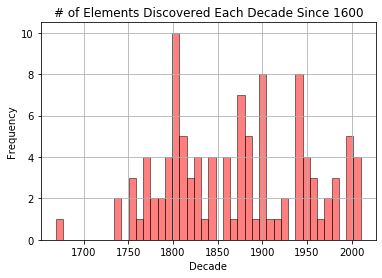

In [82]:
df_y=df.dropna(subset=['Year'])
df_y=df_y[df_y['Year']>1600]
df_y.hist('Year', bins=42, color='r', alpha = 0.5, edgecolor='black')
ax = plt.axes()
ax.set_title('# of Elements Discovered Each Decade Since 1600');
ax.set_xlabel('Decade');
ax.set_ylabel('Frequency');

Plot atomic radius vs. group for each period in one diagram with scatters connected by lines. (30 points)

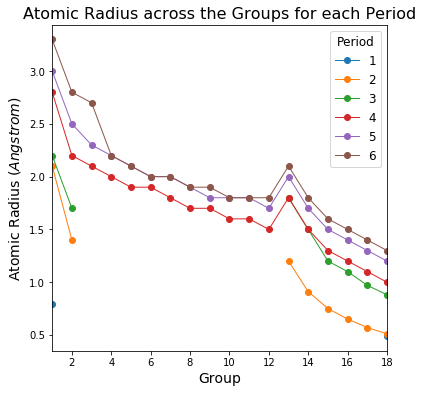

In [83]:
df_ar = df.dropna(how='any', subset=['AtomicRadius','Group'])
plt.figure(figsize=(6,6))
plt.xlim(1,18)
plt.title('Atomic Radius across the Groups for each Period', fontsize=16)
plt.xlabel('Group', fontsize = 14)
plt.ylabel('Atomic Radius $(Angstrom)$', fontsize = 14)
df_ar = df_ar.pivot_table('AtomicRadius', index='Group', columns='Period')
plt.plot(df_ar, '-o', linewidth = 1)
plt.legend(df_ar.keys(), fontsize=12, title = 'Period', title_fontsize = 12)

Plot first ionization vs. electronegativity for each period in different subplots, with the size and color of scatters correlated to the atomic radius. (30 points)
* create a plot with 6 subplots
* in each subplot, create scatter plot for first ionization vs. electronegativity for each period (subplot 1 for period 1 etc.) with the size and color of scatters correlated to the atomic radius

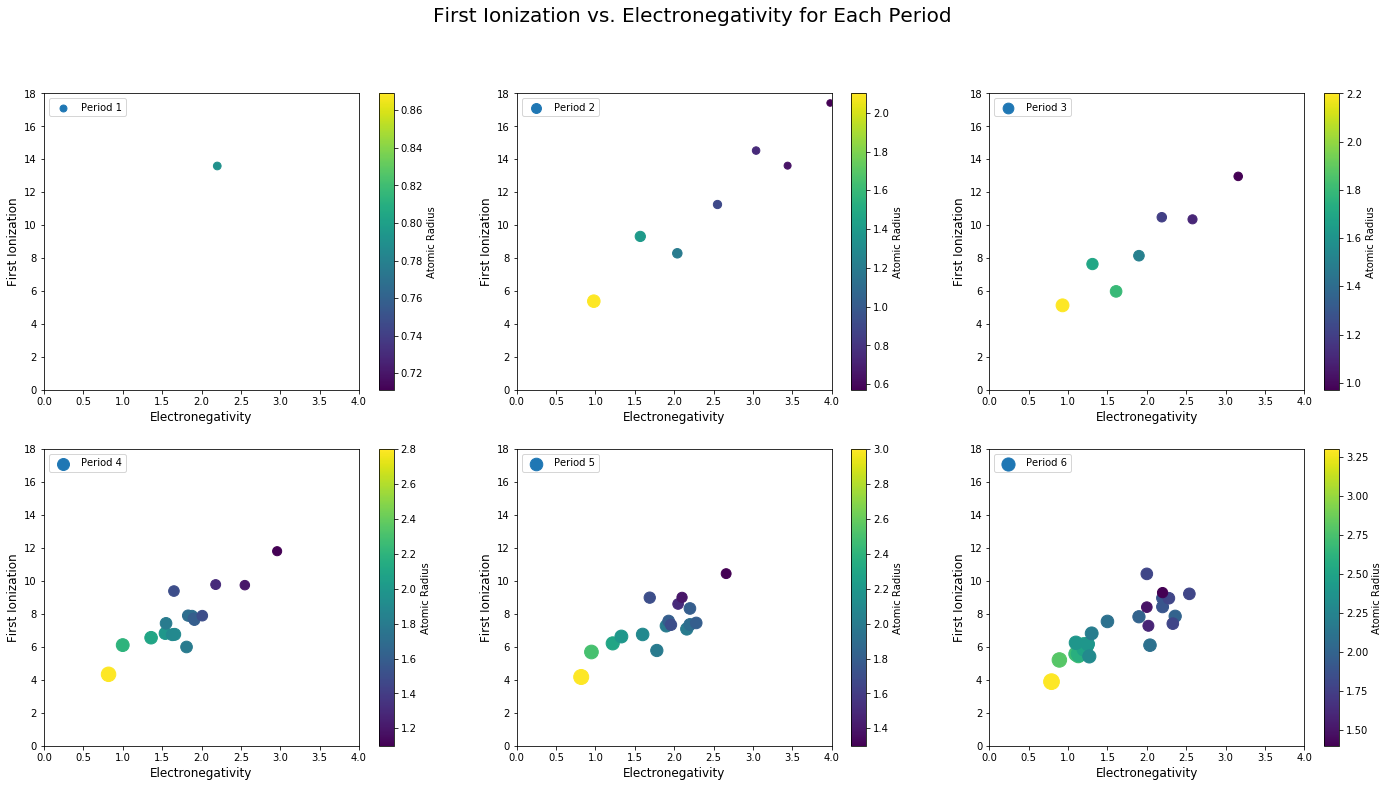

In [88]:
##use plt.scatter since we want points of different size and colors 
plot = plt.figure(figsize=(24,12))
plt.suptitle('First Ionization vs. Electronegativity for Each Period', fontsize=20)
for i in range(1,7):
    subplot = plot.add_subplot(2,3,i)
    df_new = df[df.Period == i]
    plt.scatter(df_new['Electronegativity'],df_new['FirstIonization'], s = df_new['AtomicRadius']*75, c = df_new['AtomicRadius'], label = 'Period '+str(i))
    subplot.set_ylabel('First Ionization', fontsize=12)
    subplot.set_xlabel('Electronegativity', fontsize=12)
    subplot.set_xlim(0,4)
    subplot.set_ylim(0,18)
    subplot.legend(loc = 'upper left')
    plt.colorbar(label = 'Atomic Radius')
